# Visualize replicate reproducibility metrics

In [1]:
from pathlib import Path
import random
import numpy as np
import pandas as pd
from ast import literal_eval #to handle the list

import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as gg

In [2]:
plt.style.use("seaborn-ticks")
plt.rcParams["image.cmap"] = "Set1"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
%matplotlib inline

In [3]:
results_folder = 'results/'
figures_folder = 'figures/'

In [4]:
corr_replicating_df = pd.read_csv(Path(results_folder + "percent_replicating.tsv"), sep='\t', 
                                  converters={"Null_corr":literal_eval, "Replicate_corr":literal_eval})
corr_replicating_df.Null_corr = [[float(a) for a in x] for x in corr_replicating_df.Null_corr]
corr_replicating_df.Replicate_corr = [[float(a) for a in x] for x in corr_replicating_df.Replicate_corr]
corr_replicating_df

,Experiment,Null_corr,Percent_Replicating,Replicate_corr,Value_95
0,ES2 median plates,"[0.180845076250728, 0.5308219840803317, 0.2058...",0.625,"[0.5973352365938563, 0.5684542749248489, 0.622...",0.614689
1,ES2 weighted plates,"[-0.3874697135488868, 0.024678471290850577, 0....",0.607,"[0.050807259598664334, 0.18136109203030223, 0....",0.389789
2,HCC44 median plates,"[0.613138408969547, 0.32197569282171024, 0.358...",0.679,"[0.6166827700702135, 0.6521944680575164, 0.591...",0.649704
3,HCC44 weighted plates,"[-0.18368280545556603, -0.11760750850047931, 0...",0.616,"[0.8155205649089808, -0.4066895085799368, 0.84...",0.610244
4,A549 median plates,"[0.4141561173086472, 0.4409969187743149, 0.404...",0.420,"[0.5286342235265379, 0.5339082704648461, 0.459...",0.621783
5,A549 weighted plates,"[-0.3091651651535289, 0.055988767346546134, 0....",0.393,"[-0.3469551610951277, 0.14920425576519147, 0.1...",0.682522


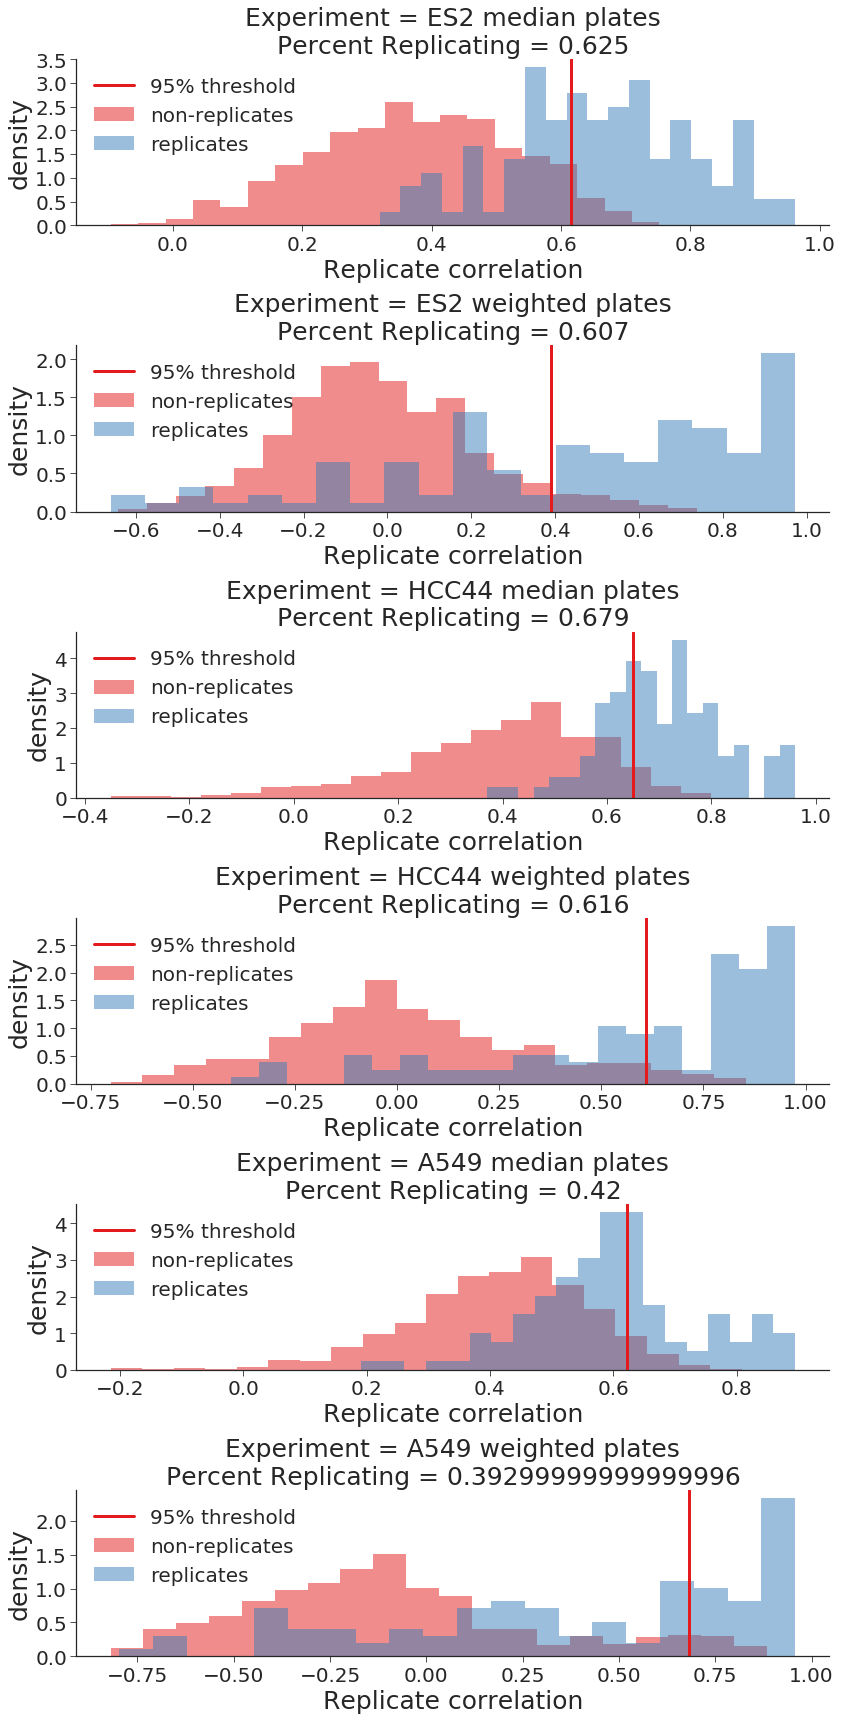

In [5]:
n_experiments = len(corr_replicating_df)

plt.rcParams['figure.facecolor'] = 'white' # Enabling this makes the figure axes and labels visible in PyCharm Dracula theme
plt.figure(figsize=[12, n_experiments*4])

for i in range(n_experiments):
    plt.subplot(n_experiments, 1, i+1)
    plt.hist(corr_replicating_df.loc[i,'Null_corr'], label='non-replicates', density=True, bins=20, alpha=0.5)
    plt.hist(corr_replicating_df.loc[i,'Replicate_corr'], label='replicates', density=True, bins=20, alpha=0.5)
    plt.axvline(corr_replicating_df.loc[i,'Value_95'], linewidth=3, label='95% threshold')
    plt.legend(fontsize=20)
    plt.title(
        f"Experiment = {corr_replicating_df.loc[i,'Experiment']}\n" +
        f"Percent Replicating = {corr_replicating_df.loc[i,'Percent_Replicating']}",
        fontsize=25
    )
    plt.ylabel("density", fontsize=25)
    plt.xlabel("Replicate correlation", fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.despine()
plt.tight_layout()
plt.savefig(Path(figures_folder + 'percent_replicating.png'))

In [6]:
corr_matching_df = pd.read_csv(Path(results_folder + "percent_matching.tsv"), sep='\t',
                                converters={"Matching_corr":literal_eval, "Null_Matching":literal_eval})
corr_matching_df.Matching_corr = [[float(a) for a in x] for x in corr_matching_df.Matching_corr]
corr_matching_df.Null_Matching = [[float(a) for a in x] for x in corr_matching_df.Null_Matching]

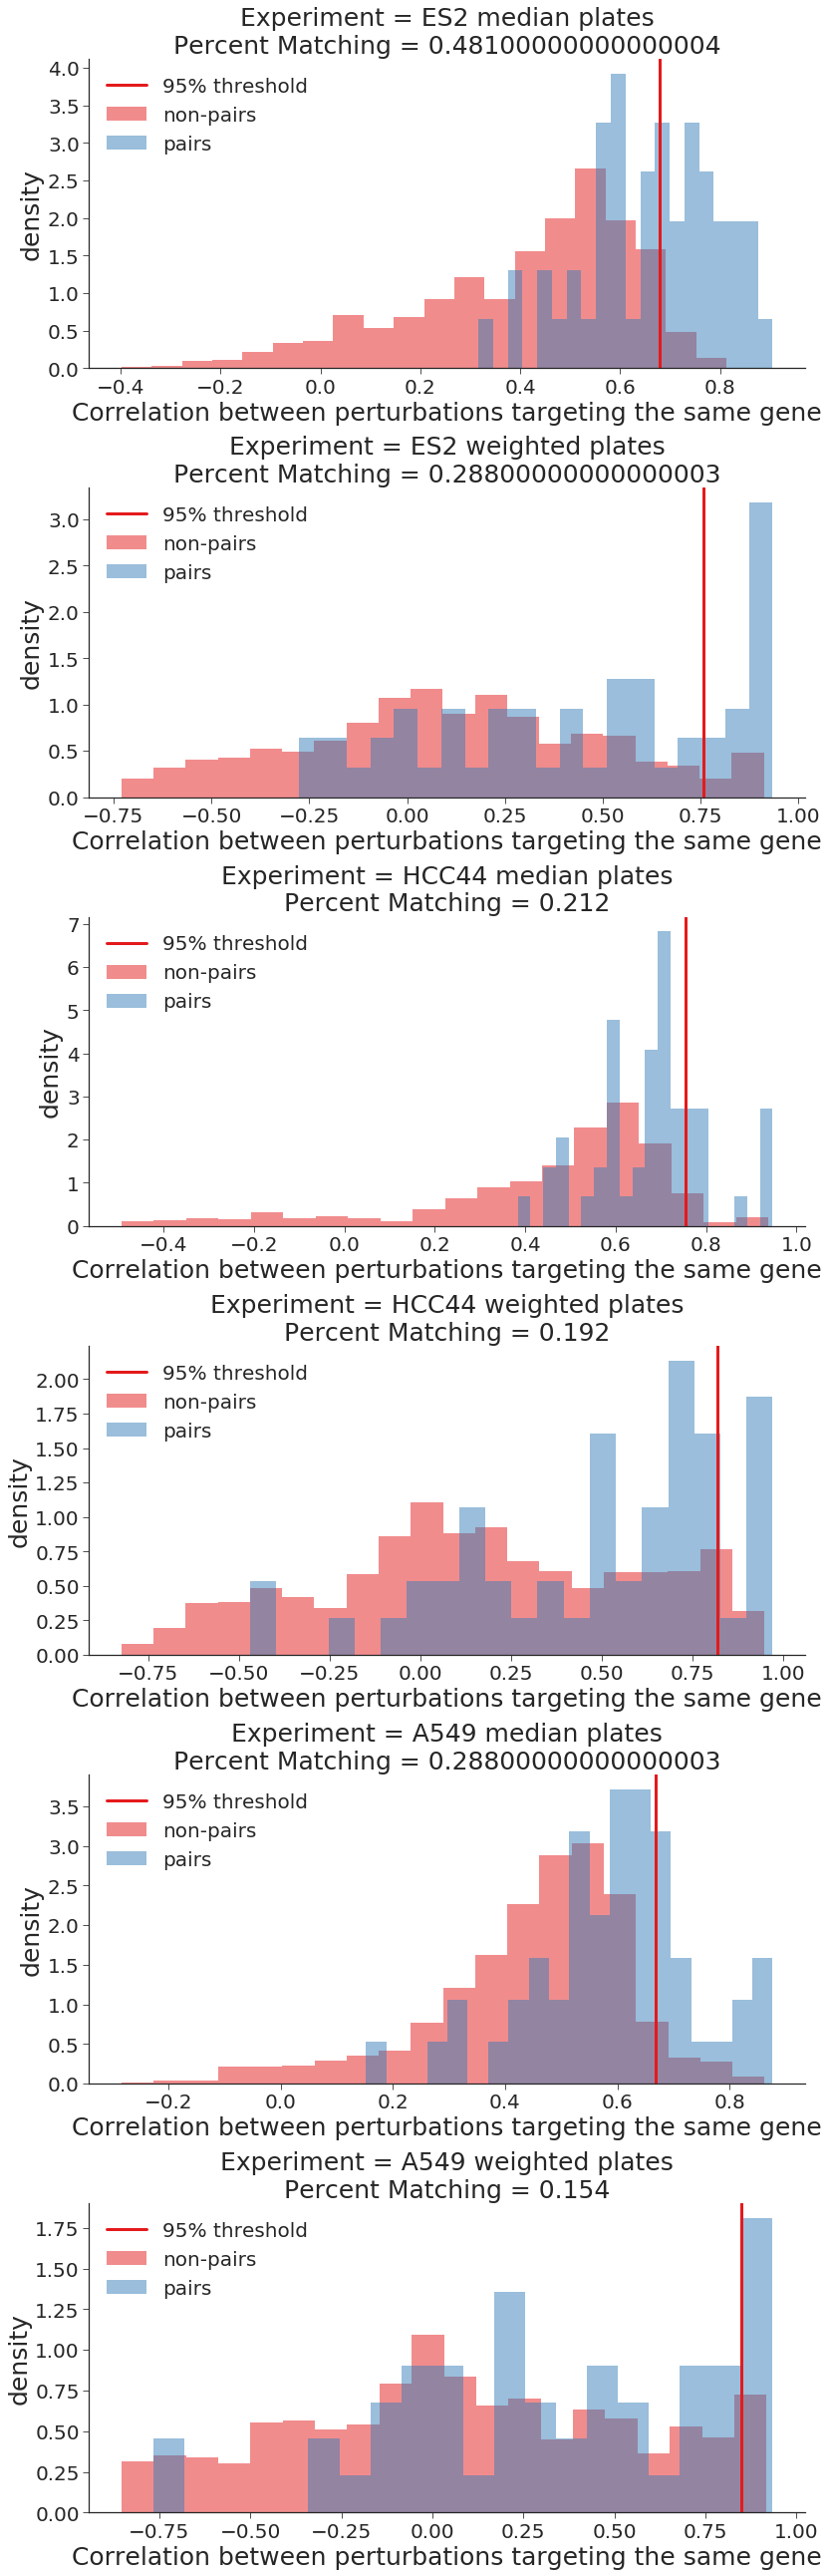

In [7]:

n_experiments = len(corr_matching_df)

plt.rcParams['figure.facecolor'] = 'white' # Enabling this makes the figure axes and labels visible in PyCharm Dracula theme
plt.figure(figsize=[12, n_experiments*6])

for i in range(n_experiments):
    plt.subplot(n_experiments, 1, i+1)
    plt.hist(corr_matching_df.loc[i,'Null_Matching'], label='non-pairs', density=True, bins=20, alpha=0.5)
    plt.hist(corr_matching_df.loc[i,'Matching_corr'], label='pairs', density=True, bins=20, alpha=0.5)
    plt.axvline(corr_matching_df.loc[i,'Value_95'], linewidth=3, label='95% threshold')
    plt.legend(fontsize=20)
    plt.title(
        f"Experiment = {corr_matching_df.loc[i,'Experiment']}\n" +
        f"Percent Matching = {corr_matching_df.loc[i,'Percent_Matching']}",
        fontsize=25
    )
    plt.ylabel("density", fontsize=25)
    plt.xlabel("Correlation between perturbations targeting the same gene", fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.despine()
plt.tight_layout()
plt.savefig(Path(figures_folder + 'percent_matching.png'))